## 비지도 학습

#### 비지도학습
- 결과값 없이 입력값만 주고 학습을 시켜 유사성을 파악하게 하는 방식 (정답 없음)
- 데이터의 숨겨진 특징이나 구조를 발견하는데 사용
- 정답이 없는 입력 데이터만 이용하기 때문에 입력값 자체의 특성과 분포만을 파악해서 그룹핑하는 군집화에 주로 사용


#### 비지도 학습 유형
1. 비지도 변환 (unsupervised transformation)
    - 데이터를 새롭게 표현하여 사람이나 머신러닝 알고리즘이 원래 데이터보다 쉽게  해석할 수 있도록 만드는 알고리즘
    - 차원축소 : 피처가 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법 (PCA)
    

2. 군집 (clustering)
    - 데이터를 비슷한 것끼리 그룹으로 묶는 작업
    - k-평균 
    - DBSCAN

## 군집화
- 데이터 포인트들을 별개의 군집으로 그룹화하는 것
- 유사성이 높은 데이터들을 동일한 그룹으로 분류하고
    - 서로 다른 군집들이 상이성을 가지도록 그룹화

### 군집화 활용 분야
- 세분화(Segmentation) 작업 : 고객/마켓/브랜드/사회 경제활동 등 특정 유형으로 분리
- 이미지 검풀
- 이상 검출

군집화 알고리즘 
- K-Means : centroid 기반. 비즈니스적인 세분화 영역에서 가장 많이 활용
- Mean Shift : centroid 기반. K-Means와는 다르게 이동하는 방식
- Gaussian Mixture Model : 데이터 세트가 어느 정규 분포에 속하는지에 따라 군집화 수행
- DBSCAN : 데이터의 밀도에 따라 군집화 수행


## K-means 알고리즘

K-평균
- 군집화(clustering)에서 가장 일반적으로 사용되는 알고리즘
- 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해서 
- 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

K-평균 동작 원리
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고
- 이동된 중심점에서 다시 가까운 포인트를 선택,
- 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행
- 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고
- 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법


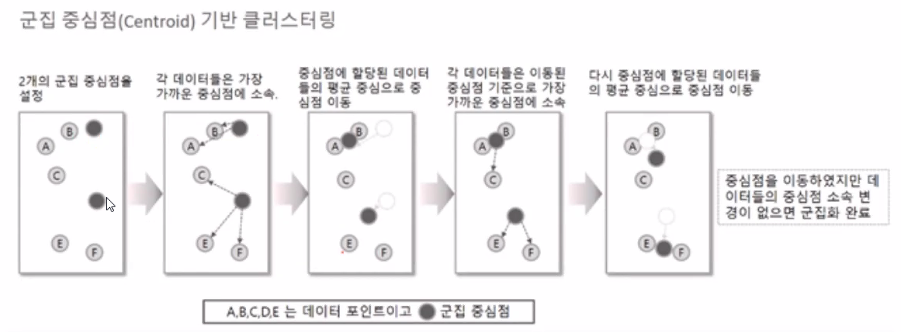

#### K-Means의 장점과 단점

* 장점
    - 알고리즘이 쉽고 간결
    - 대용량 데이터에도 활용 가능
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘

* 단점
    - 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 
    - (PCA로 차원 축소 적용 필요할 수도 있음)
    - 반복횟수가 많을 경우 수행시간 느려짐
    - 이상치 데이터에 취약
    - 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어려움


#### 사이킷런 KMeans 클래스

**주요 파라미터**
- n_clusters : 군집화할 개수. 즉, 군집 중심점의 개수
- init : 초기에 군집 중심점의 좌표를 설정하는 방식. 
    - 일반적으로 k-means++ 방식으로 최초 설정
    
**KMeans 메서드**
- fit(데이터 세트)
- fit_transform(데이터 세트)

**군집화 관련 주요 속성**
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표


### K-Means를 이용한 붓꽃(Iris) 데이터셋 Clustering

붓꽃 데이터를 이용해서 K-평균 군집화 수행
- 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인하고
- 이를 분류값과 비교


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()


In [3]:
## 데이터 확인을 위해 DF로 변환
irisDF=pd.DataFrame(data=iris.data, columns=iris.feature_names)
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


KMeans 객체르 생성하고 군집화 수행

In [4]:
# 붓꽃 데이터 세트를 3개의 그룹으로 군집화
# KMeans(그룹 수, 초기 중심 설정 방식(디폴트:k-means++ or random), 최대 반복 횟수, 랜덤 스테이트)

kmeans = KMeans(n_clusters=3,  init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF) # DF 바로 사용 가능

KMeans(n_clusters=3, random_state=0)

In [5]:
#Labels_ 속성을 통해 각 데이터 포인트 별로 할당된 군집 중심점을 확인
print(kmeans.labels_)

# 결과
# 0, 1, 2 :  첫번째 군집, 두번째 군집, 세번째 군집에 속함을 의미

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [6]:
# 동일한 데이터로 예측했으므로 Labels_와 같은 결과가 나옴
print(kmeans.predict(irisDF))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


**사용 데이터 iris가 정답이 있는 데이터이므로 실제 분류값과 군집 결과가 얼마나 차이가 나는지 확이**

In [7]:
## DF에 target과 cluster 결과 컬럼 추가
irisDF['target']=iris.target # 실제 품종값
irisDF['cluster']=kmeans.labels_ # 군집화 분류값

In [8]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [9]:
# target과 cluster 값 개수 비교
iris_result = irisDF.groupby(['target', 'cluster'])['sepal length (cm)'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64


##### 붓꽃 데이터셋의 군집화를 시각화
- 2차원 평면상에서 개별 데이터의 군집화를 시각적으로 표현
- 붓꽃 데이터 세트의 속성이 4개이므로, 2차원 평면에 적합치 않기 때문에
- PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤에
- X 좌표, Y 좌표로 개별 데이터 표현


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) ## 차원을 2개로 축소
pca_transformed = pca.fit_transform(iris.data)

In [11]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
## 꽃잎은 꽃잎 끼리 꽃받침은 꽃받침끼리
pca_transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [13]:
# 첫번째 값 (X좌표)
irisDF['pca_x']=pca_transformed[:,0]

# 두번째 값 (y좌표)
irisDF['pca_y']=pca_transformed[:,1]

irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


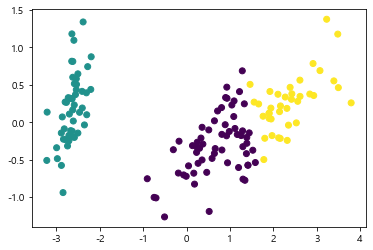

In [16]:
# 산점도로 표현 : 군집별로 다른 색상으로 표시
plt.scatter(x=irisDF.loc[:,'pca_x'],y=irisDF.loc[:,'pca_y'],c=irisDF.loc[:,'cluster'])

## 그래프 결과
- 왼쪽에 모여있는 1번 군집은 속성 위치가 명확히 분리되어 있음
- 오른쪽에 모여있는 0번과 2번 군집은 속성의 위치가 명확히 분리되기 어려운 부분이 존재1

### 군집화(Clustering) 알고리즘 테스트를 위한 데이터 생성

**사이킷런의 대표적인 군집화용 데이터 생성기**
- make_blobs() : 개별 군집의 중심점과 표준 편차 제어 기능 추가되어 있음
- make_classification() : 노이즈를 포함한 데이터를 만드는데 유용하게 사용
- 둘 다 비슷하게 여러 개의 클래스에 해당하는 데이터 세트 생성하는데
- 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성 가능
- 둘 중에 어떤 것을 사용하든 큰 차이는 없음
- 둘 다 분류용 테스트 데이터 생성도 가능
- 이 외에도 make_circle(), make_moon() API는 중심 기반의 군집화로 
- 해결하기 어려운 데이터 세트를 만드는데 사용


#### make_blobs()의 주요 파라미터

* n_samples: 생성할 총 데이터의 개수. 디폴트는 100개. 
    
* n_features: 데이터의 피처 개수 
    - 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 
    - 두 번째 피처는 y 좌표상에 표현  

* centers: int 값, 예를 들어 3으로 설정하면 군집의 개수
    - 그렇지 않고 ndarray 형태로 표현할 경우 
    - 개별 군집 중심점의 좌표를 의미  

* cluster_std: 생성될 군집 데이터의 표준 편차
    - 만일 float 값 0.8과 같은 형태로 지정하면 
    - 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐   
    - [0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 
    - 첫 번째 군집 내 데이터의 표준편차는 0.8, 
    - 두 번째 군집 내 데이터의 표준 편차는 1.2, 
    - 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듦
    - 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용


In [17]:
# 군집화(Clustering) 알고리즘 테스트를 위한 데이터 생성

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [18]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)#n_features=2 독립변수 2개 
print(X.shape, y.shape)

(200, 2) (200,)


In [19]:
# y 타겟값의 분포 확인
unique, count = np.unique(y, return_counts=True)
unique, count
# 3개의 군집으로 나누어지고 갯수 표현

(array([0, 1, 2]), array([67, 67, 66], dtype=int64))

In [20]:
## DF로 변환
## 피처명 : ftr1, ftr2

import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


#### 생성된 데이터셋을 이용하여 시각화

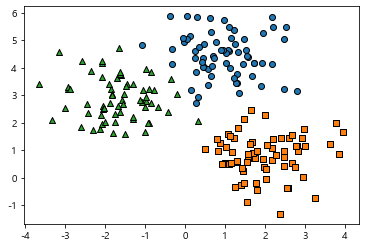

In [21]:
target_list = np.unique(y)

markers=['o', 's', '^', 'P','D','H','x']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target]) ## 마커르 따로 쓰기 위해
    
plt.show()

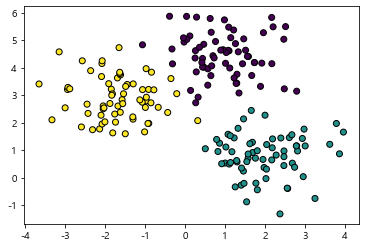

In [24]:
# 각 cluster별로  마커 생성하지 않고 표현
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )


**K-means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화**
- KMeans 군집화 수행 후 군집별로 시각화하고 
- 개별 군집의 중심 위치 좌표 표시
    - cluster_centers_ 속성 : 개별 군집의 중심 위치 좌표


In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels
clusterDF.head()

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


#### 개별 군집 중심 위치 좌표와 클럿스터 레이블을 이용한 시각화

In [26]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
centers
unique_labels

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

array([0, 1, 2])

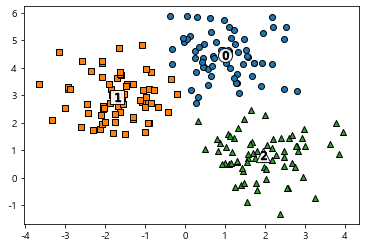

In [29]:
# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    # 군집별 마커로 산점도 표현
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    # 중심 좌표에 마커별 표시
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    # 마커 내에 레이블 값 표시
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)


### 비교
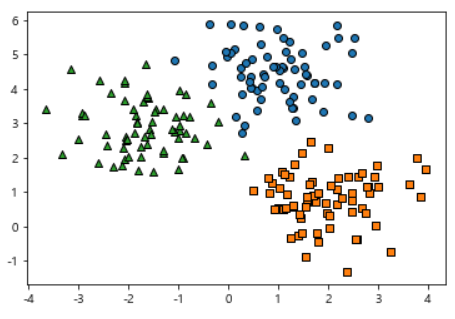